In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [98]:
data = np.loadtxt('ex1data1.txt',delimiter =',', unpack = True)
x = np.transpose(np.array(data[:-1]))
y = np.transpose(np.array(data[1:]))

x = np.insert(x,0,1, axis = 1) #inserting extra column as x = 1

Text(0.5, 1.0, 'Initial Plot')

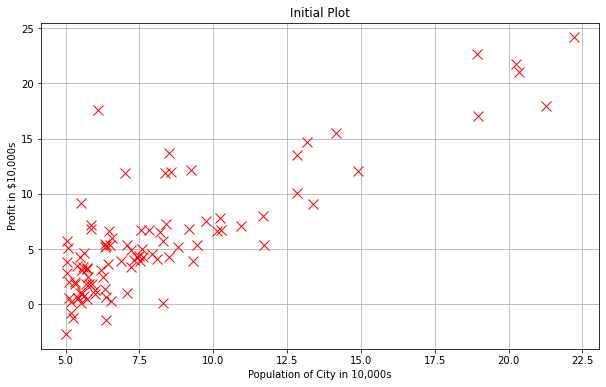

In [114]:
#plt.figure(figsize=(15,10))
#plt.plot(x[:,1],y[:,0], color = 'r', markersize = 8)

#Plot the data to see what it looks like
plt.figure(figsize=(10,6))
plt.plot(x[:,1],y[:,0],'rx',markersize=10)
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.title('Initial Plot')

In [143]:
iterations = 1500
alpha = 0.01

In [144]:
#Defining Hypothesis
def h(theta,x):
    return np.dot(x,theta)

In [145]:
#defining cost function

def computeCost(mytheta, x ,y):
    
    return float((1./(2*m)) * np.dot((h(mytheta,x)-y).T,(h(mytheta,x)-y)))

In [146]:
initial_theta = np.zeros((x.shape[1],1)) #declaring initial theta vecstor with n rows and 1 column

In [147]:
computeCost(initial_theta, x,y)

32.07273387745567

In [164]:
def gradDescent(x,theta_start = np.zeros(2)):
    theta = theta_start
    theta = theta_start
    jvec = [] #Used to plot cost as function of iteration
    thetahistory = [] #Used to visualize the minimization path later on
    for meaninglessvariable in range(iterations):
        tmptheta = theta
        jvec.append(computeCost(theta,x,y))
        # Buggy line
        #thetahistory.append(list(tmptheta))
        # Fixed line
        thetahistory.append(list(theta[:,0]))
        #Simultaneously updating theta values
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(theta,x) - y)*np.array(x[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, thetahistory, jvec

In [165]:
theta, thetahistory, jvec = gradDescent(x,initial_theta)

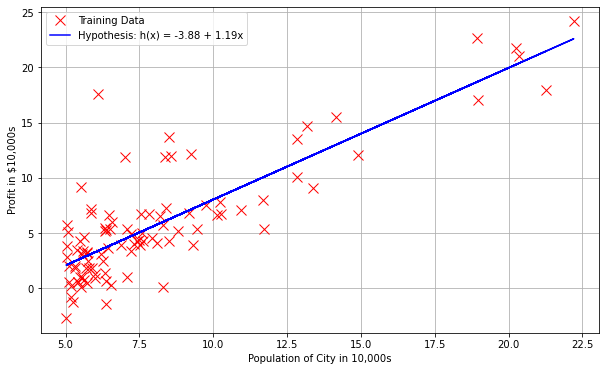

In [167]:
def myfit(xval):
    return theta[0] + theta[1]*xval
plt.figure(figsize=(10,6))
plt.plot(x[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(x[:,1],myfit(x[:,1]),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

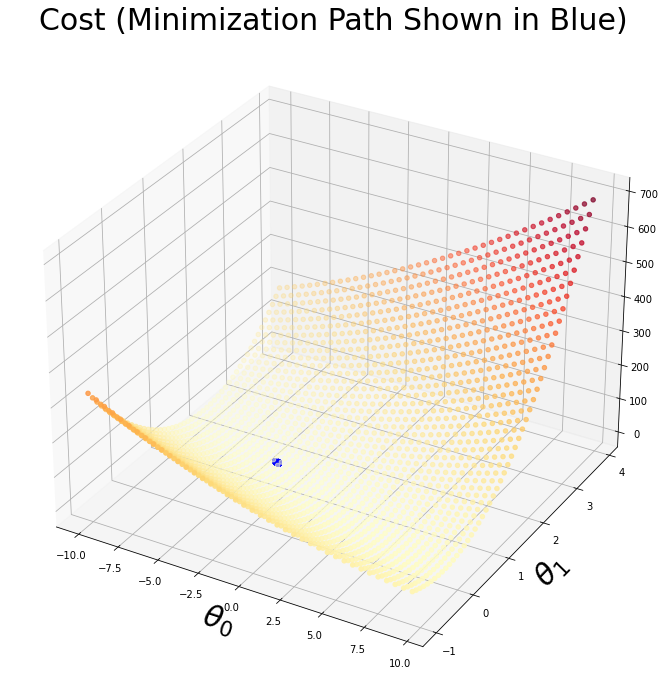

In [173]:
#Import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for j in xvals:
    for k in yvals:
        myxs.append(j)
        myys.append(k)
        myzs.append(computeCost(np.array([[j], [k]]),x,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-')
plt.show()